In [1]:
import pandas as pd
import numpy as np

In [29]:
test_data=pd.read_csv('/content/test.csv')
train_data=pd.read_csv('/content/train.csv')

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
train_data.duplicated().sum()

np.int64(0)

In [34]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

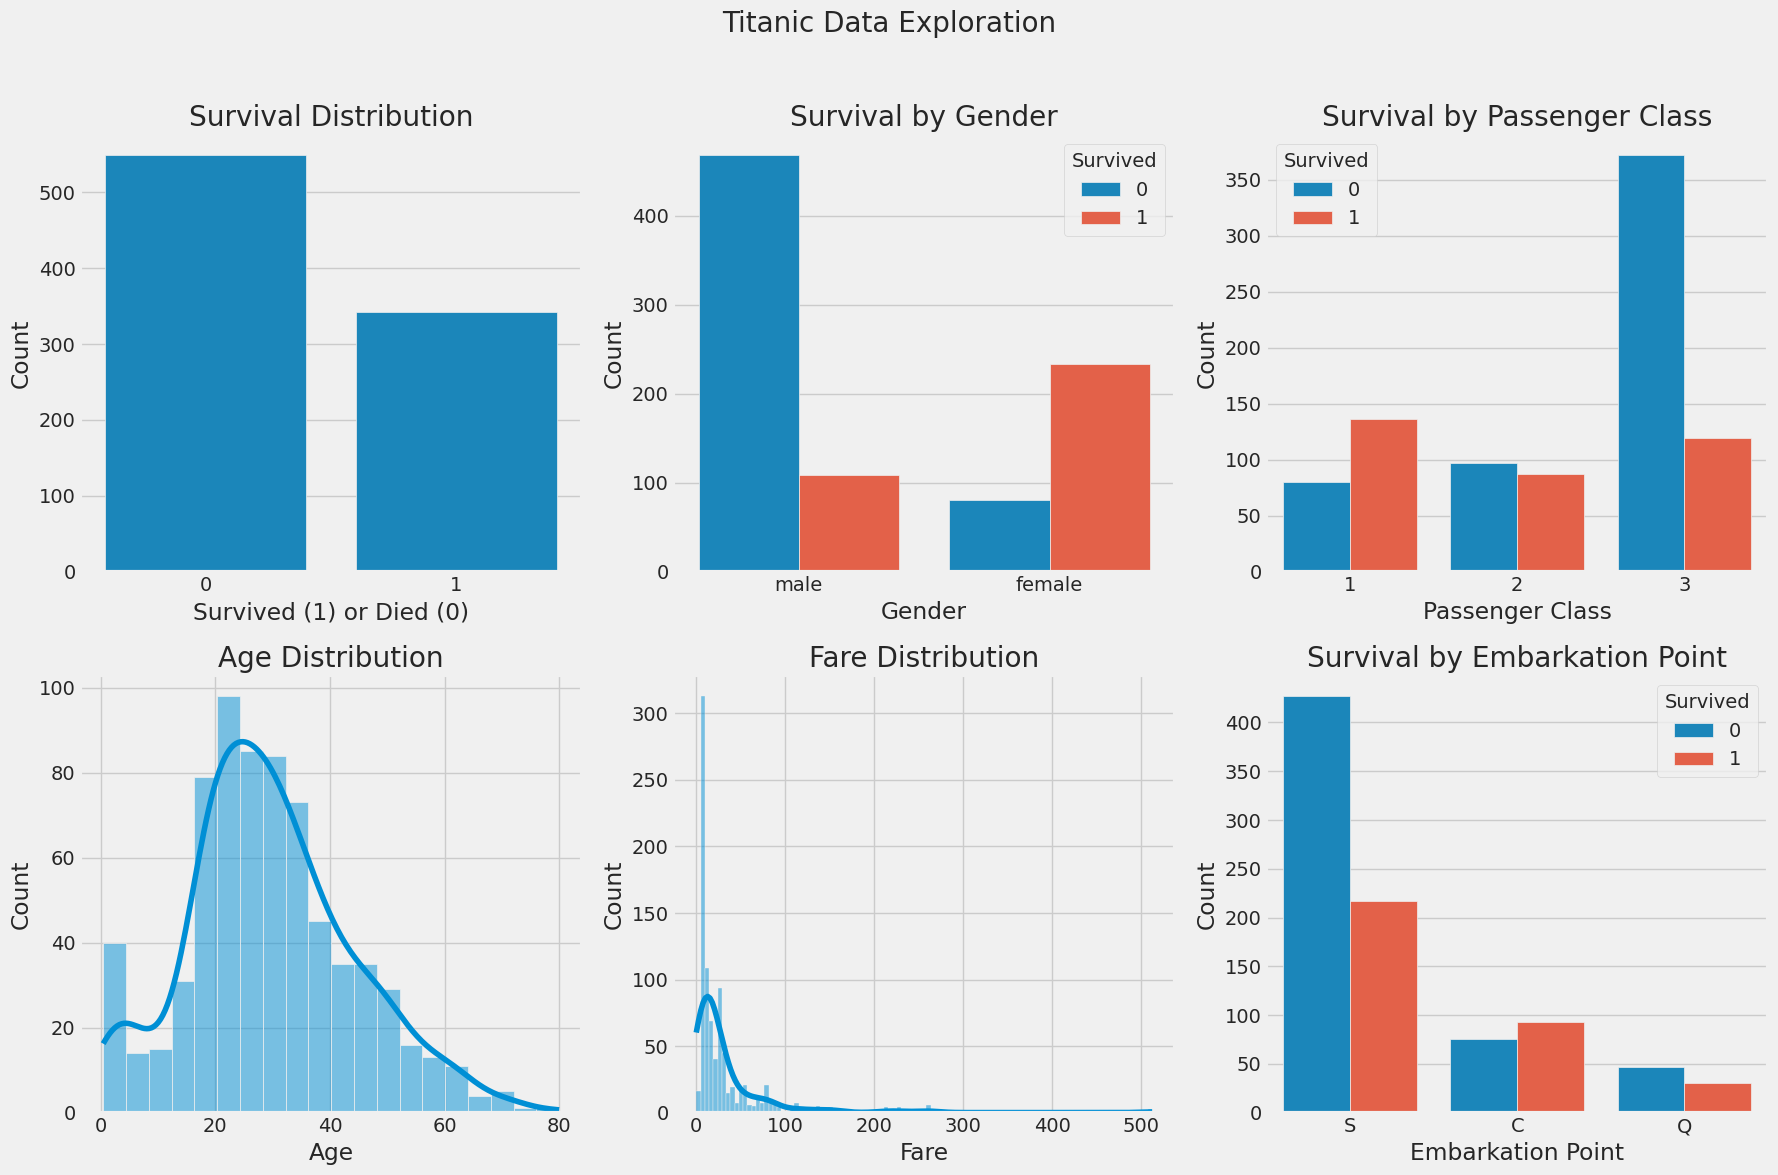

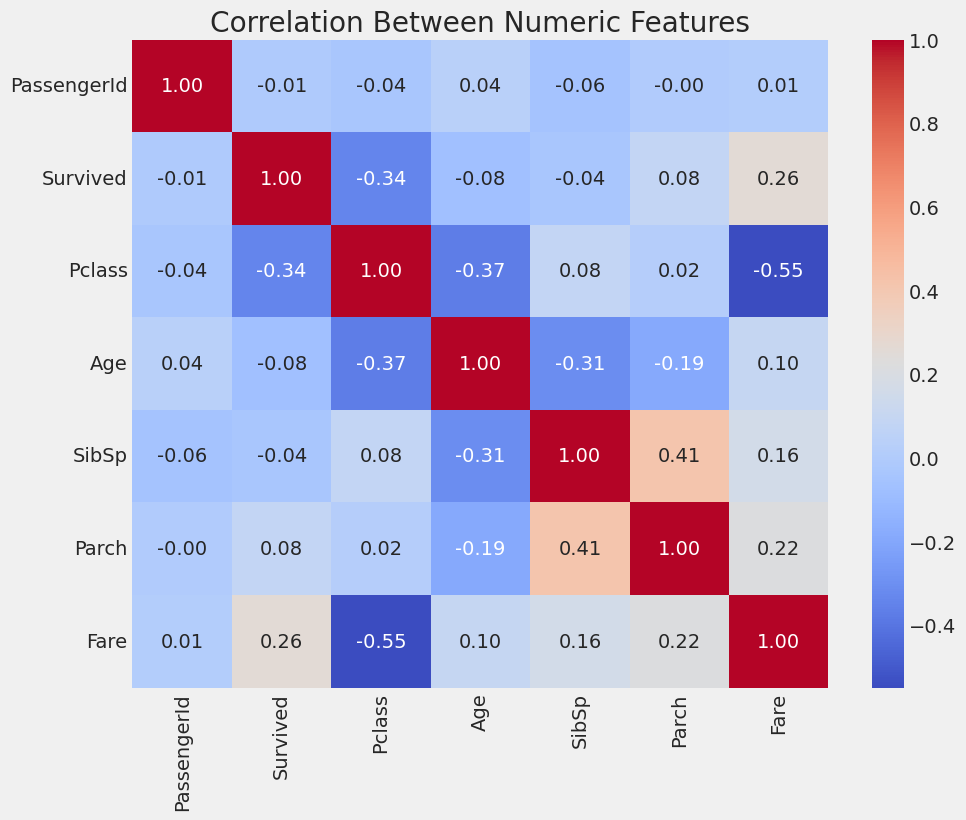

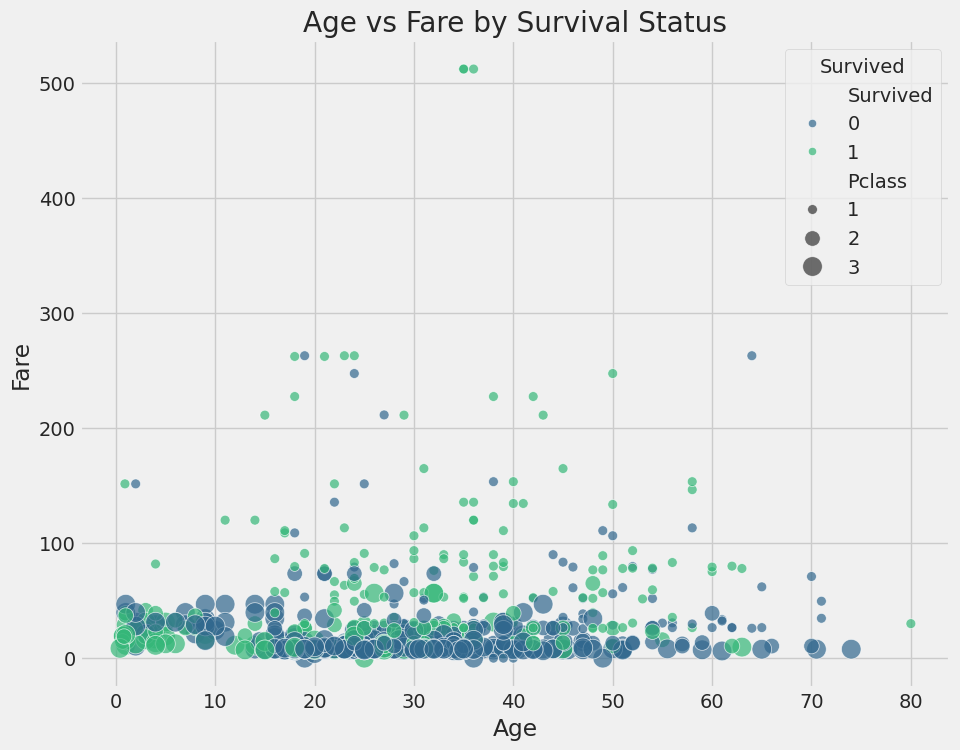

In [ ]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Data Exploration', fontsize=20)

# Survival count
sns.countplot(x='Survived', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Survival Distribution')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Survived (1) or Died (0)')

# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Gender')

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train_data, ax=axes[0, 2])
axes[0, 2].set_title('Survival by Passenger Class')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xlabel('Passenger Class')

# Age distribution
sns.histplot(train_data['Age'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Age')

# Fare distribution
sns.histplot(train_data['Fare'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Fare')

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_data, ax=axes[1, 2])
axes[1, 2].set_title('Survival by Embarkation Point')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_xlabel('Embarkation Point')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_visualizations.png')
plt.show()

# Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Age vs Fare by Survival
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, palette='viridis', size='Pclass', sizes=(50, 200), alpha=0.7)
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.savefig('age_fare_scatter.png')
plt.show()

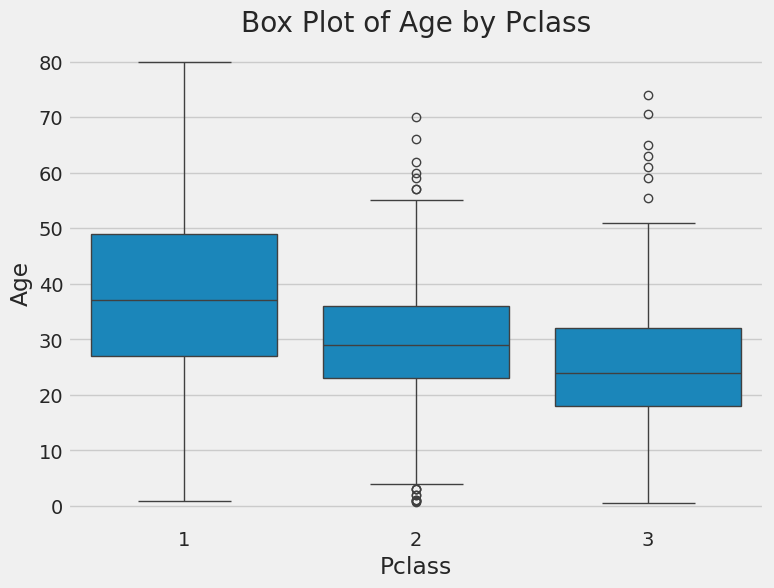

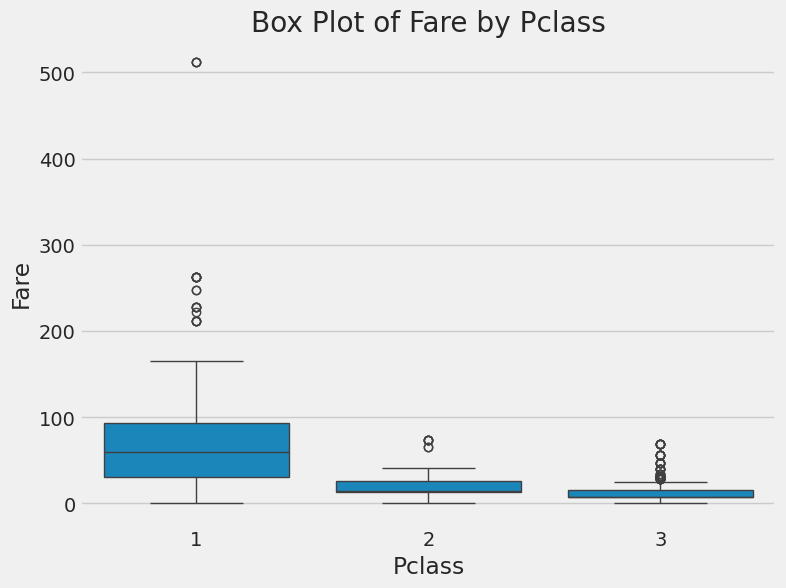

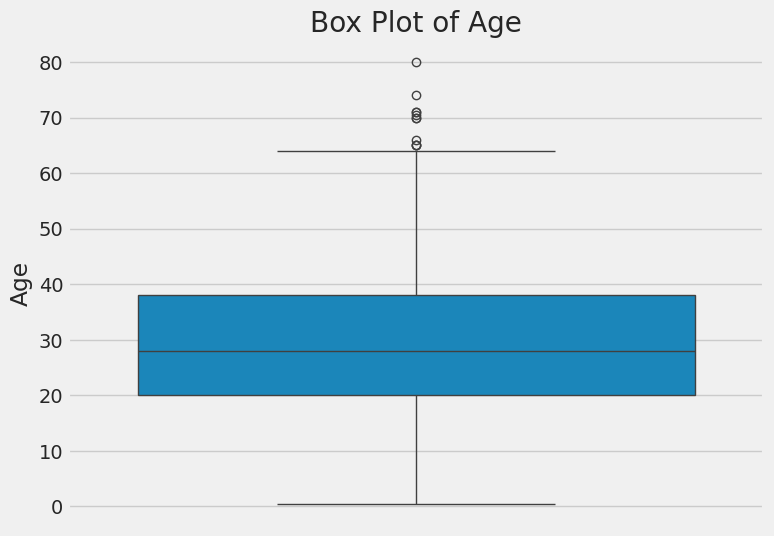

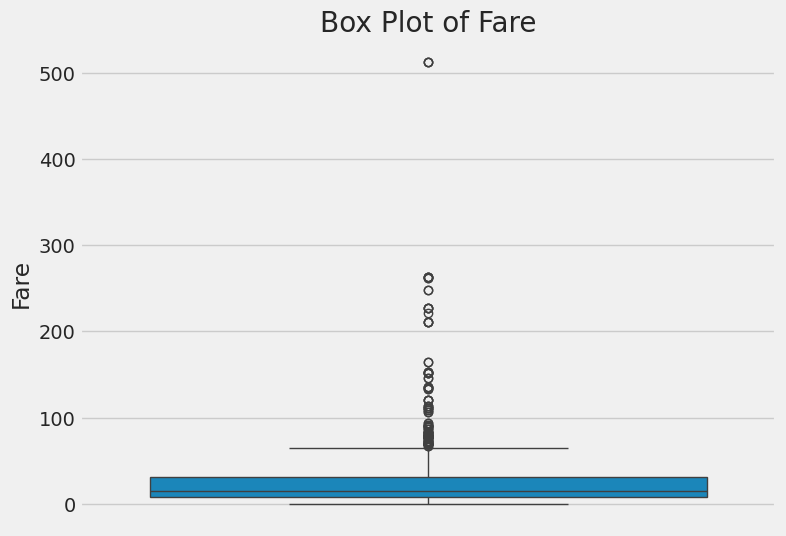

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data, numerical_features, categorical_feature=None):
    """Plots box plots for numerical features, optionally grouped by a categorical feature.

    Args:
        data: The pandas DataFrame containing the data.
        numerical_features: A list of numerical feature names.
        categorical_feature: The name of a categorical feature to group by (optional).
    """
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        if categorical_feature:
            sns.boxplot(x=categorical_feature, y=feature, data=data)
            plt.title(f'Box Plot of {feature} by {categorical_feature}')
        else:
            sns.boxplot(y=feature, data=data)
            plt.title(f'Box Plot of {feature}')
        plt.xlabel(categorical_feature or '')  # Set x-axis label if categorical feature is provided
        plt.ylabel(feature)
        plt.show()

# Example usage with grouping:
numerical_features = ['Age', 'Fare']  # Replace with your numerical features
categorical_feature = 'Pclass'  # Replace with your categorical feature
plot_boxplots(train_data, numerical_features, categorical_feature)

# Example usage without grouping:
plot_boxplots(train_data, numerical_features)

1. eda_visualizations.png

This figure contains 6 subplots, let's break them down individually:

Survival Distribution: Shows that more passengers died than survived in the Titanic disaster.
Survival by Gender: Shows that a significantly higher proportion of females survived compared to males.
Survival by Passenger Class: Shows that passengers in higher classes (1st) had a better survival rate, while 3rd class passengers had the lowest survival rate.
Age Distribution: Shows that the age distribution is slightly right-skewed, with a majority of passengers between 20 and 40 years old.
Fare Distribution: The fare distribution is heavily right-skewed, indicating that most passengers paid lower fares, with a few outliers paying very high fares.
Survival by Embarkation Point: Shows that passengers embarking from Cherbourg (C) had a slightly higher survival rate compared to those embarking from Queenstown (Q) or Southampton (S).
2. correlation_heatmap.png

This heatmap shows the correlation between numerical features in the Titanic dataset.

Positive Correlation: 'Fare' and 'Pclass' have a moderate negative correlation, indicating that higher fares were associated with higher passenger classes. 'SibSp' and 'Parch' show a weak positive correlation, suggesting that passengers traveling with siblings/spouses were more likely to travel with parents/children as well.
Negative Correlation: 'Pclass' and 'Survived' have a moderate negative correlation, indicating that passengers in lower classes had a lower survival rate. 'Fare' and 'Survived' show a weak positive correlation, suggesting that passengers who paid higher fares had a slightly higher chance of survival.
Weak or No Correlation: Most other feature pairs have weak or no correlation.
3. age_fare_scatter.png

This scatter plot shows the relationship between 'Age' and 'Fare', colored by 'Survived' and with point size representing 'Pclass'.

Survival: There's no clear pattern directly relating age or fare to survival. However, passengers who paid higher fares tend to be older and have a slightly higher chance of survival.
Passenger Class: The size of the points reveals that passengers in higher classes (larger points) generally paid higher fares.
Outliers: There are a few outliers with very high fares, but no clear relationship with age or survival is apparent for these outliers.
4. plot_boxplots (Two Sets)

These box plots visualize the distribution and potential outliers for numerical features, grouped by 'Pclass' in the first set and ungrouped in the second.

Age by Pclass: Shows that passengers in higher classes tend to be older on average, with more variability in age in 1st class.
Fare by Pclass: Clearly shows that passengers in higher classes paid significantly higher fares. There are also some outliers in the fare distribution, particularly in 1st and 2nd class.
Ungrouped: The ungrouped box plots provide a general overview of the distribution and outliers for 'Age' and 'Fare' without considering passenger class.
5. plot_pairplot

This pair plot displays relationships between pairs of numerical features ('Age', 'Fare', 'SibSp', 'Parch'), colored by 'Survived'.

Correlation: You can observe the correlation between features from the scatter plots in the lower triangle of the matrix. For example, 'Age' and 'Fare' show a slight positive correlation.
Distribution: The diagonal plots show the distribution of each individual feature, providing insights into their ranges and potential skewness.
Survival: The color coding by 'Survived' helps to identify any potential patterns or differences in the relationships between features for those who survived and those who did not. For example, you might notice differences in the distribution of fares for survivors and non-survivors

#summary of findings
Survival:

Gender was a major factor in survival: Females had a significantly higher survival rate than males.
Passenger class played a crucial role: Passengers in higher classes (1st and 2nd) had better survival rates compared to those in 3rd class. This is likely linked to factors like access to lifeboats and better cabin locations.
Fare had a weak positive correlation with survival: Passengers who paid higher fares tended to have a slightly better chance of survival, suggesting an association with passenger class and better accommodations.
Embarkation point showed some variation: Passengers embarking from Cherbourg (C) had a slightly higher survival rate, though the reason for this is not immediately clear from the data.
Other Relationships and Distributions:

Age distribution: The age distribution of passengers was slightly right-skewed, with most passengers between 20 and 40 years old.
Fare distribution: The fare distribution was heavily right-skewed, with most passengers paying lower fares and a few outliers paying very high fares. This is consistent with the class distribution and the correlation between fare and class.
Family size: There was a weak positive correlation between traveling with siblings/spouses (SibSp) and traveling with parents/children (Parch), indicating that families often traveled together. However, the impact of family size on survival was not directly evident from the visualizations.

#Identifying relationships and trends
Survival:

Gender was a major factor in survival: Females had a significantly higher survival rate than males.
Passenger class played a crucial role: Passengers in higher classes (1st and 2nd) had better survival rates compared to those in 3rd class. This is likely linked to factors like access to lifeboats and better cabin locations.
Fare had a weak positive correlation with survival: Passengers who paid higher fares tended to have a slightly better chance of survival, suggesting an association with passenger class and better accommodations.
Embarkation point showed some variation: Passengers embarking from Cherbourg (C) had a slightly higher survival rate, though the reason for this is not immediately clear from the data.
Other Relationships and Distributions:

Age distribution: The age distribution of passengers was slightly right-skewed, with most passengers between 20 and 40 years old.
Fare distribution: The fare distribution was heavily right-skewed, with most passengers paying lower fares and a few outliers paying very high fares. This is consistent with the class distribution and the correlation between fare and class.
Family size: There was a weak positive correlation between traveling with siblings/spouses (SibSp) and traveling with parents/children (Parch), indicating that families often traveled together. However, the impact of family size on survival was not directly evident from the visualizations.
Overall:

The visualizations highlight the significant impact of gender and passenger class on survival during the Titanic disaster. Fare, while correlated with class, also showed a weak but positive association with survival. The age and fare distributions reveal the demographics and economic makeup of the passengers. Further analysis may be needed to explore the role of other factors, such as family size, cabin location, and individual passenger characteristics, in determining survival outcomes.